# PRCP-1000-Portuges Bank



### Details:
##### Name: Rupesh Dinkar Chavan
##### Project team's ID: PTID-CDS-JAN-24-1743
##### Batch Code: 14-AUG-23-CDS-WDA16-PUN
##### Registered Email ID: rupeshchavan712@gmail.com
##### Registration Number: +91 7798539541

In [ ]:
# imported important libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
 

# Load dataset

In [2]:
data = pd.read_csv("bank-additional-full.csv",sep=";")

# Basic checks

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
data.shape

(41188, 21)

In [9]:
data.describe(include ='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
data.duplicated().sum()

12

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
#Categorical data
categorical_columns = (data.select_dtypes (include=['object','category']))
print("\nName of columns having categorical value:\n" ,list (categorical_columns))


Name of columns having categorical value:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
#Numerical data
numerical_columns = (data.select_dtypes(exclude ="object"))
print("\nName of columns having numerical value:\n" ,list (numerical_columns))


Name of columns having numerical value:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Explolatory data analysis

# Univariate Analysis

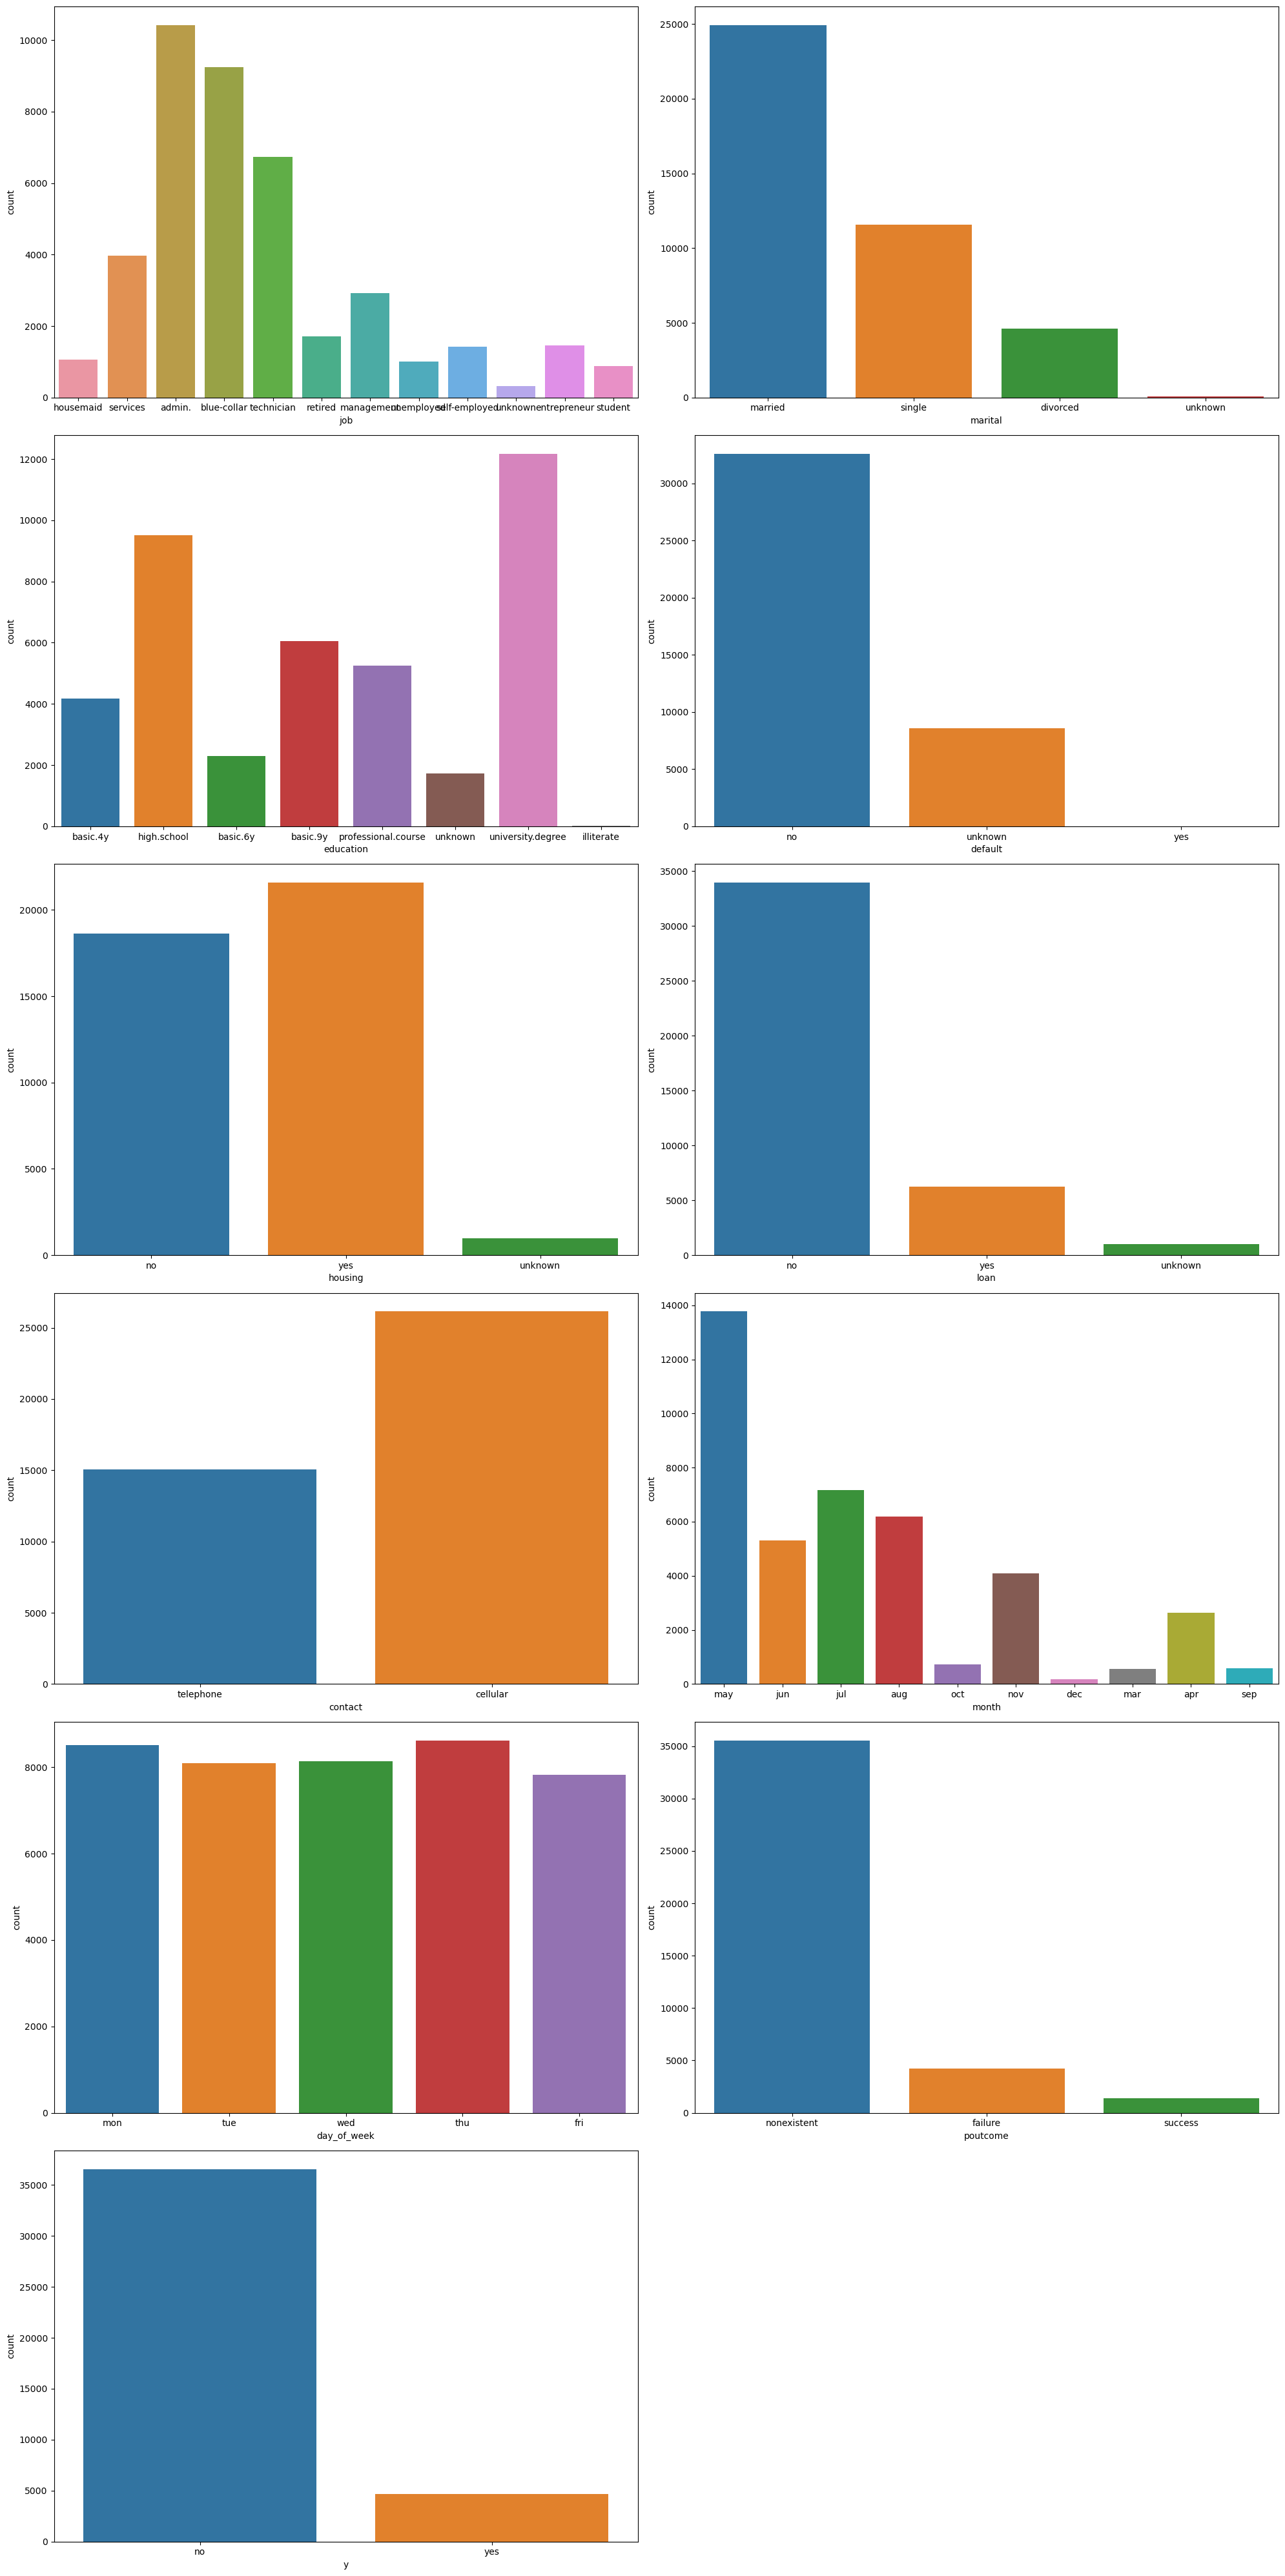

In [15]:
# plotting catagorical feature related with target 
plt.figure(figsize=(20,40),facecolor='white')#canvas size
plotnumber = 1 #count variable 

for column in categorical_columns:
    if plotnumber <=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(x=categorical_columns[column].dropna(axis=0))
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()


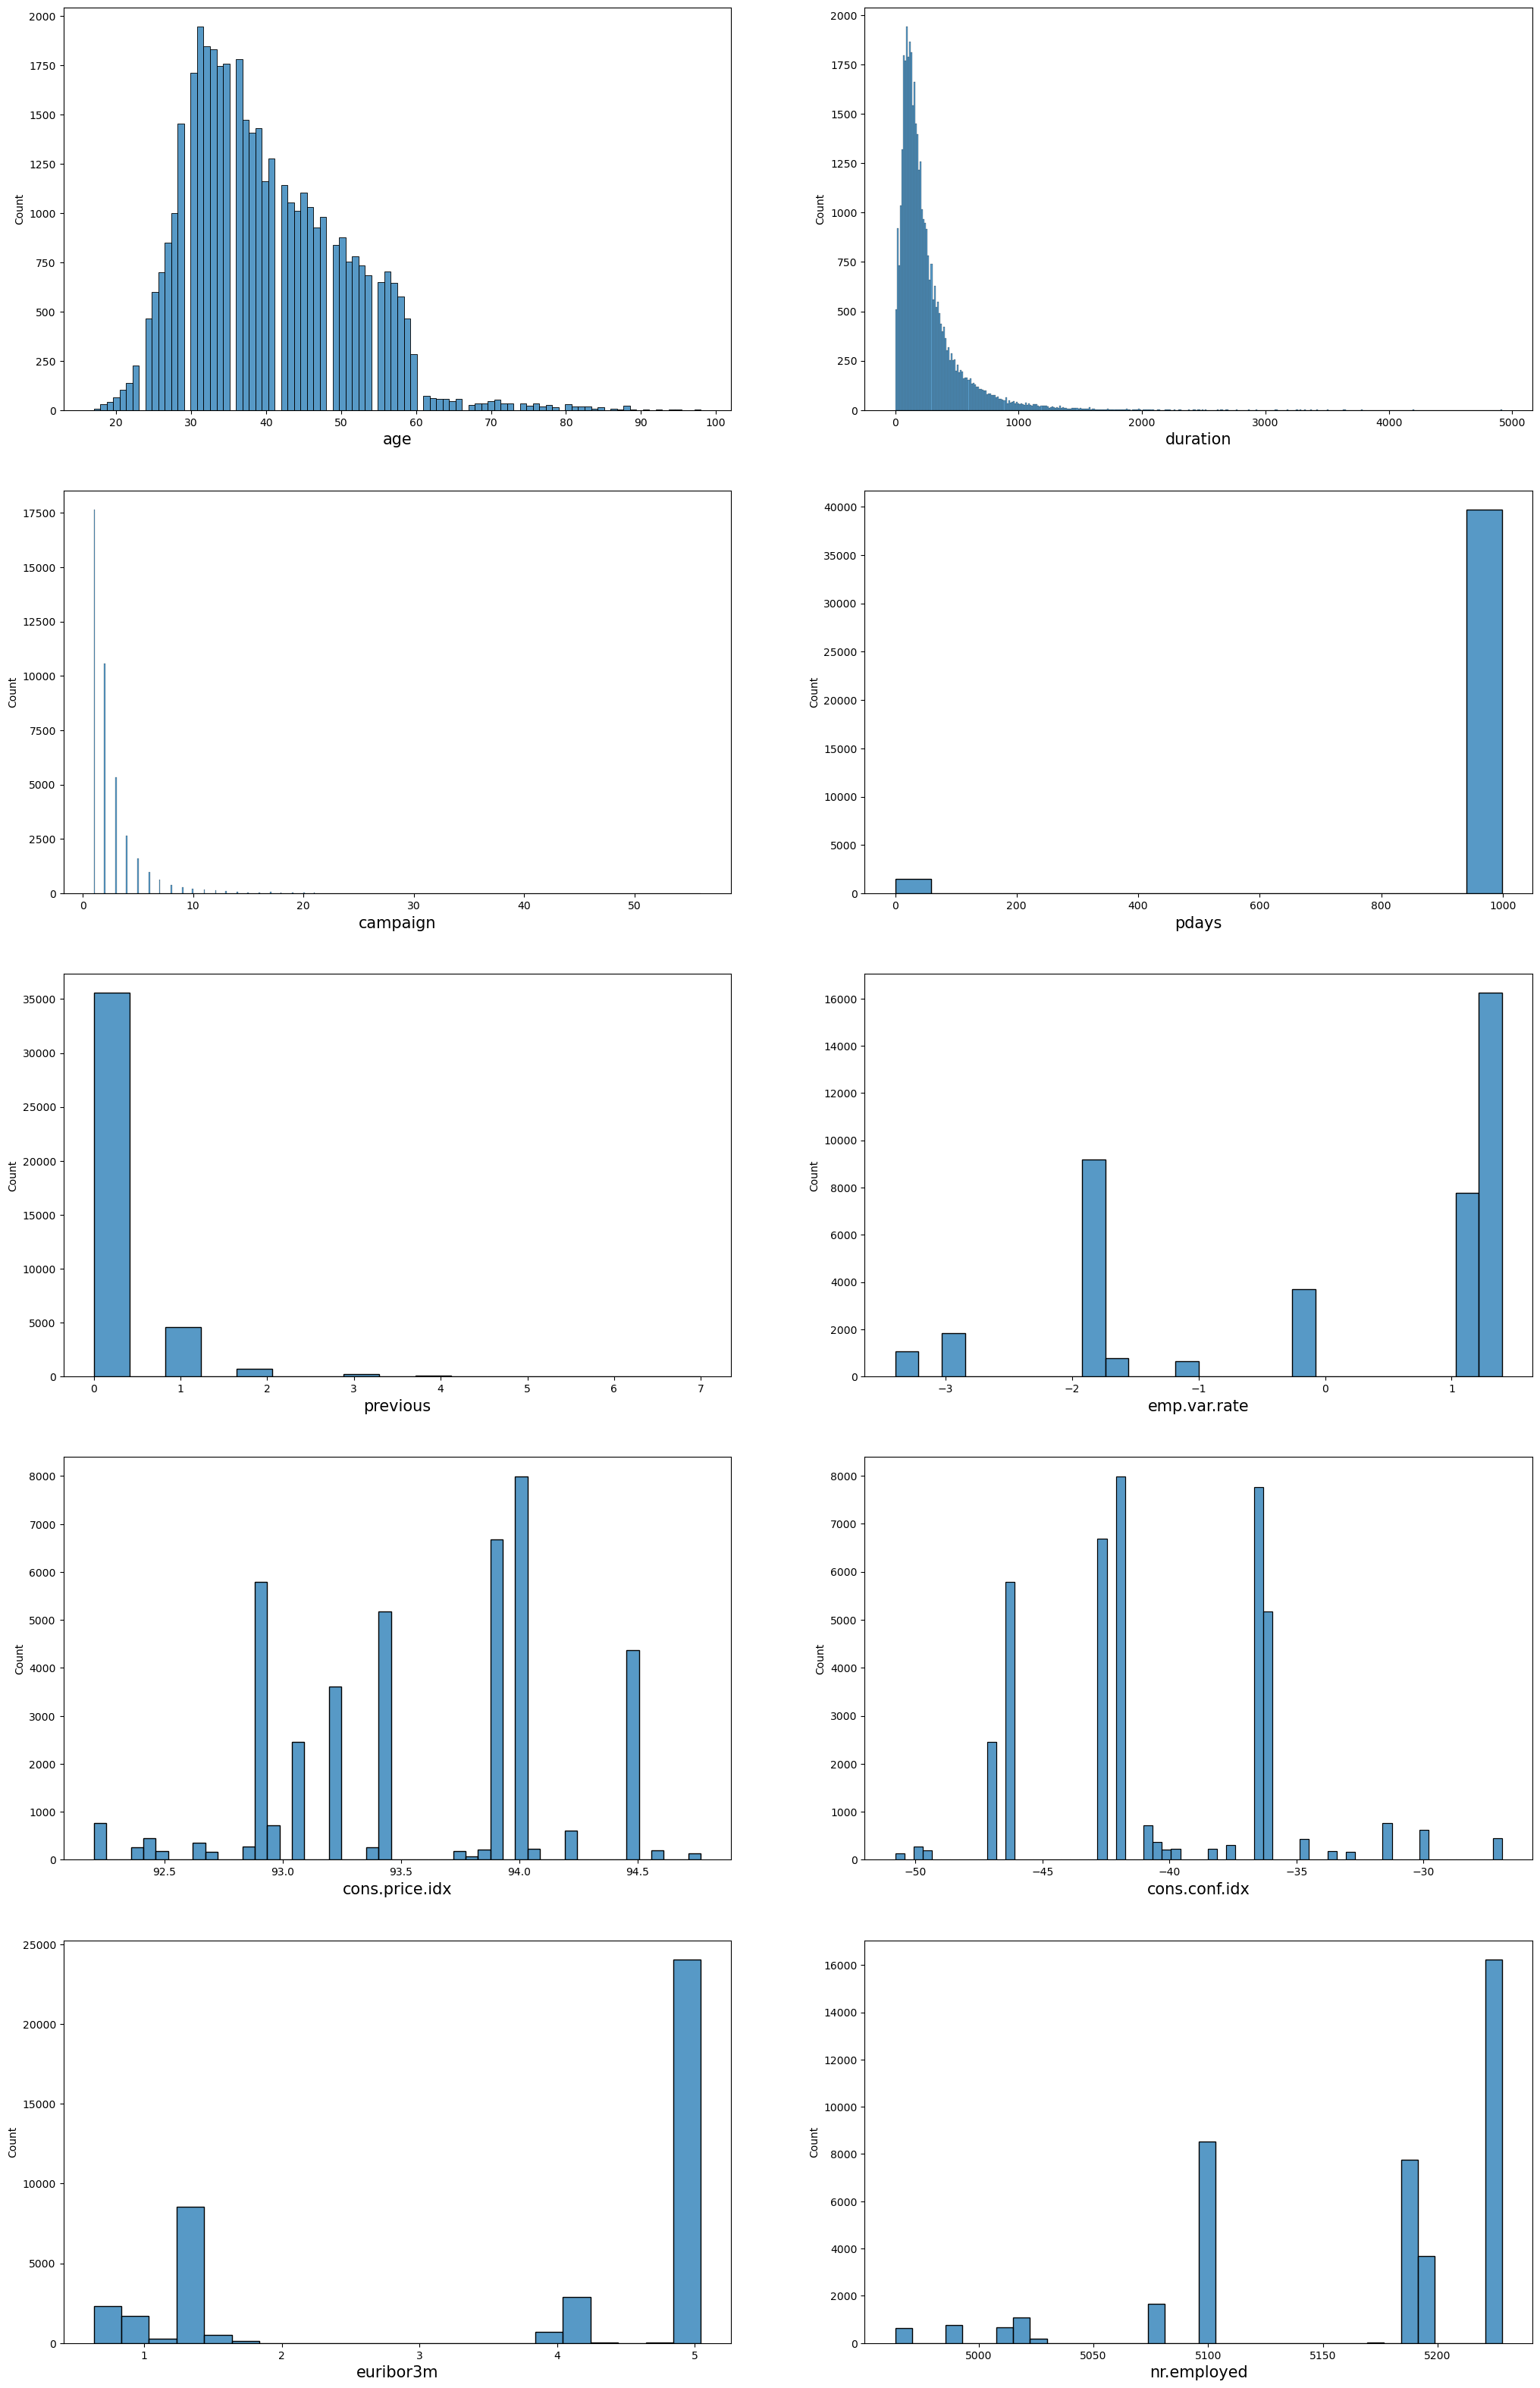

In [16]:
plt.figure(figsize=(25,40),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=10:
        ax= plt.subplot(5,2,plotnumber)
        sns.histplot(x=numerical_columns[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

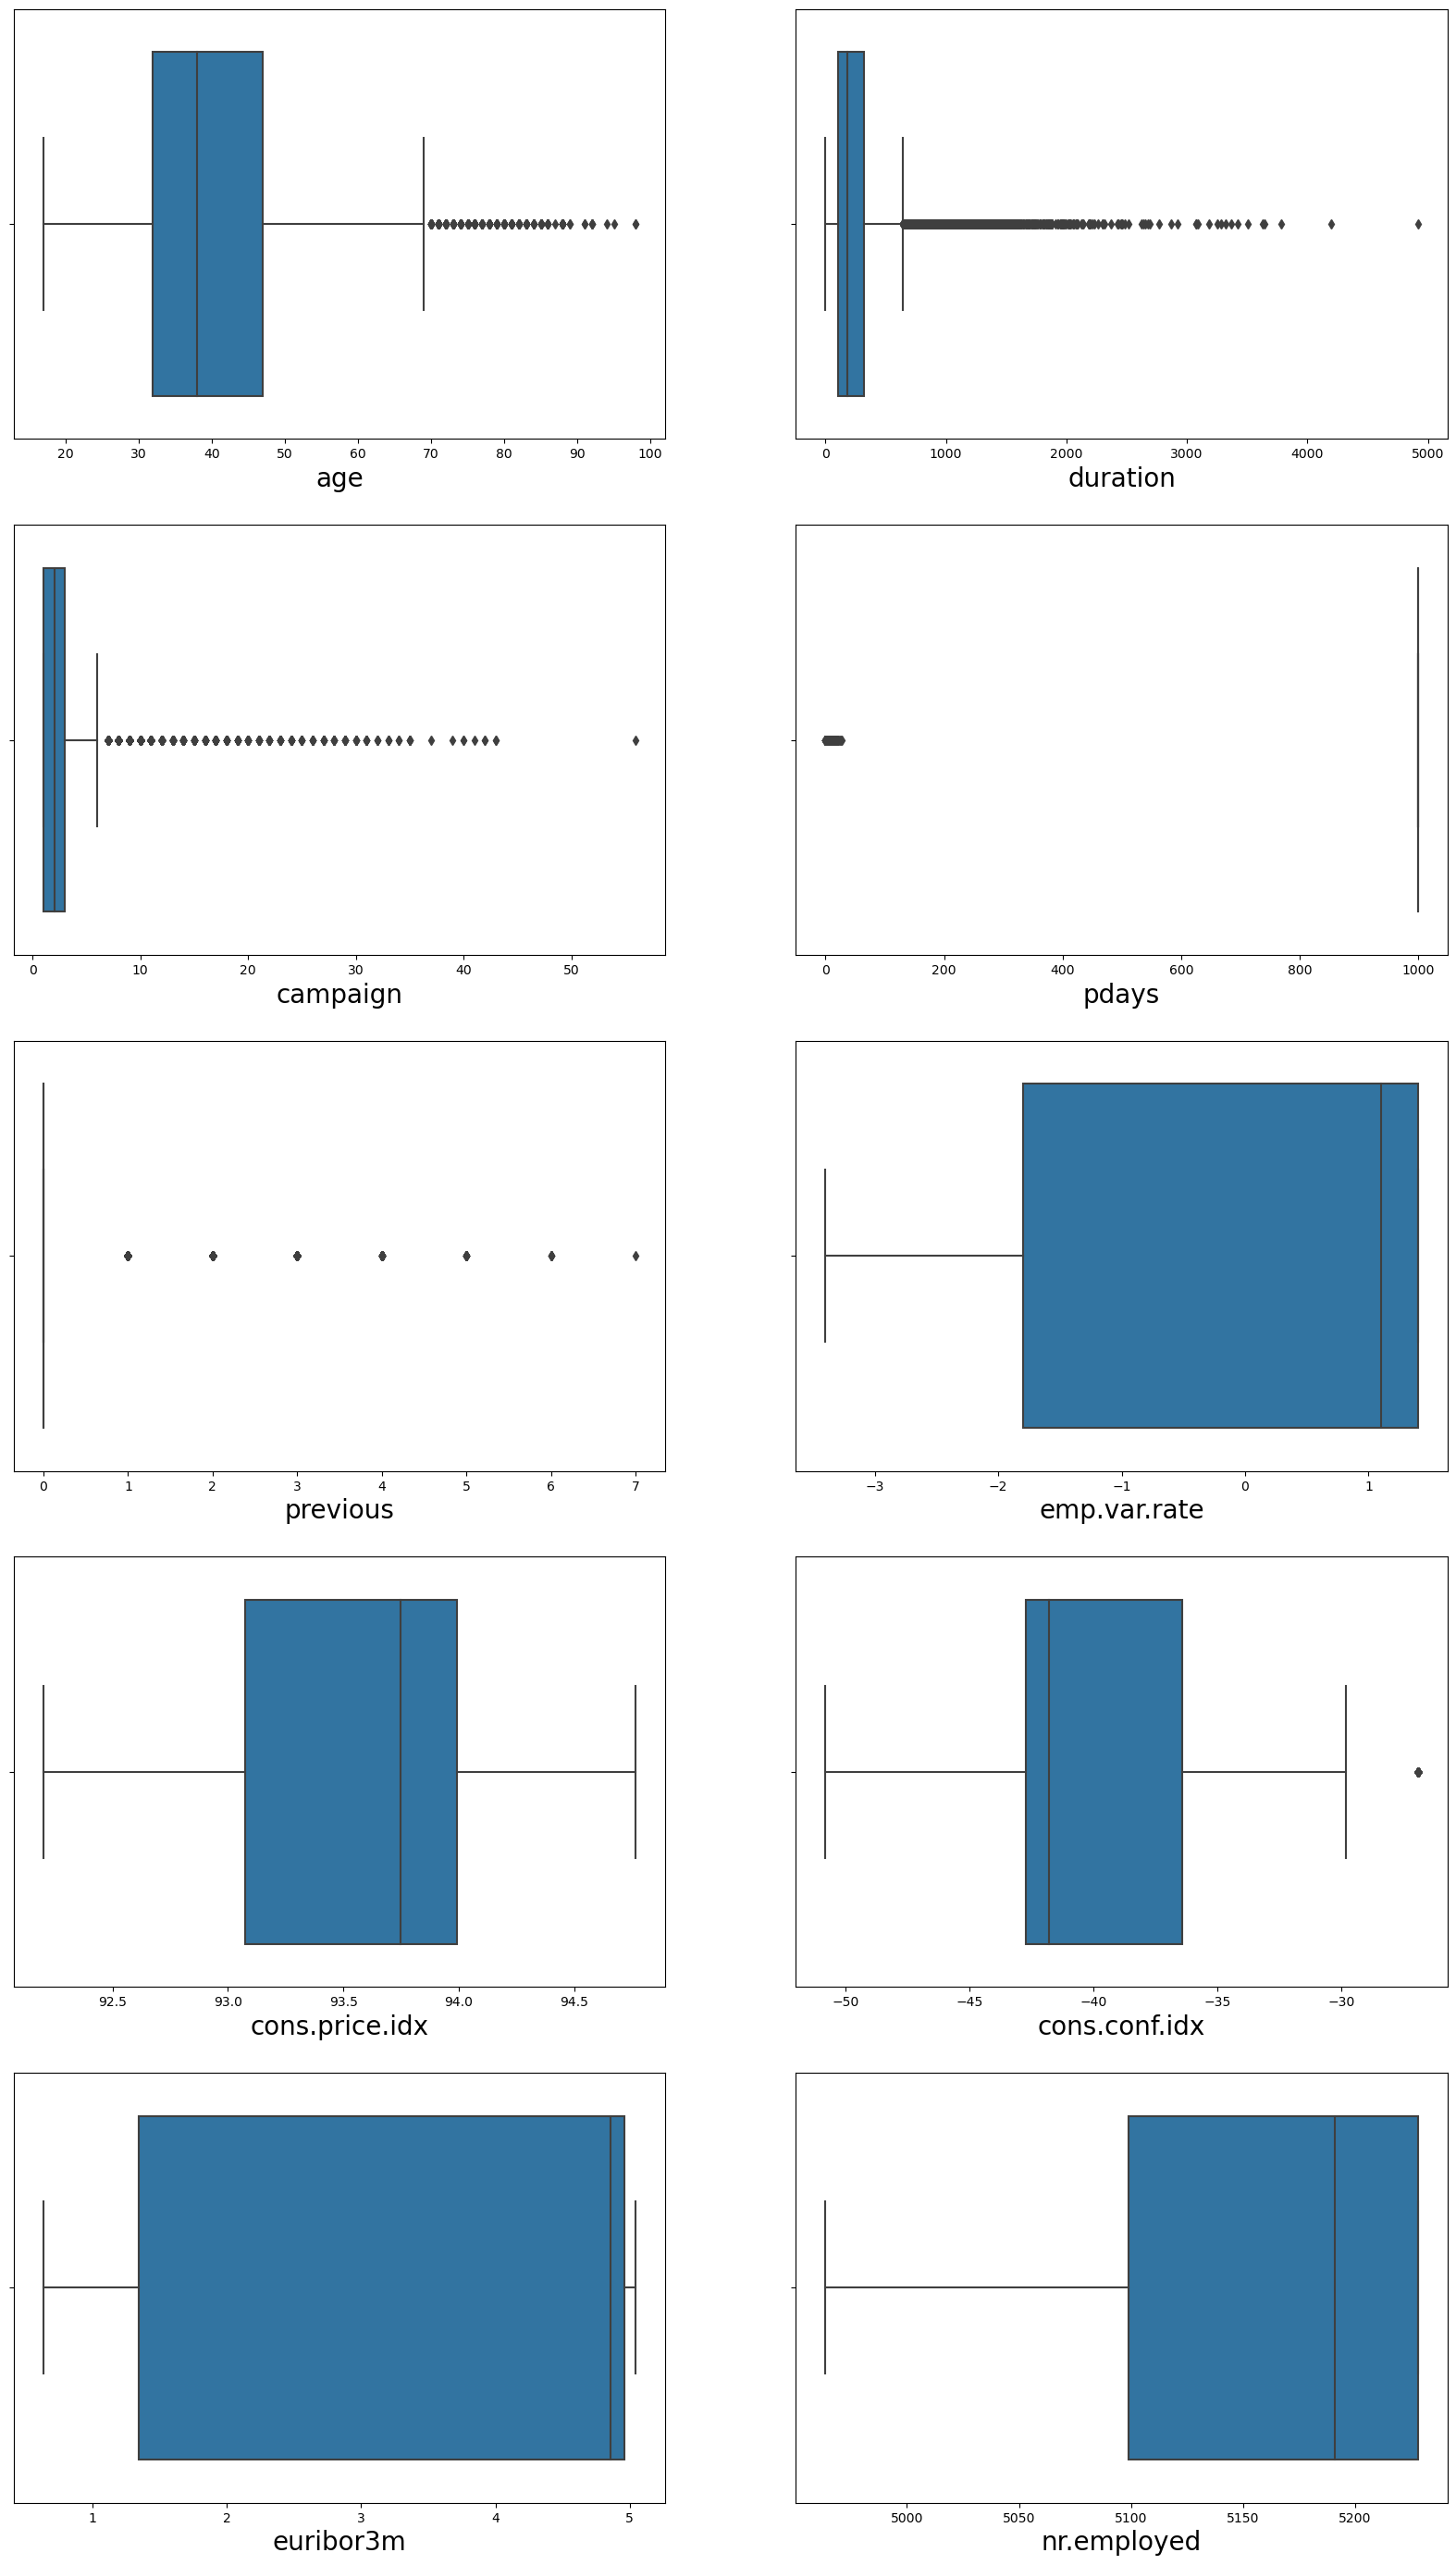

In [17]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in numerical_columns:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(x=numerical_columns[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        
        

# Bivariant analysis

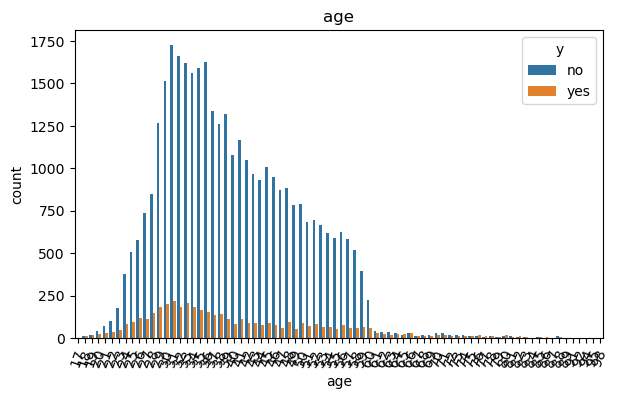

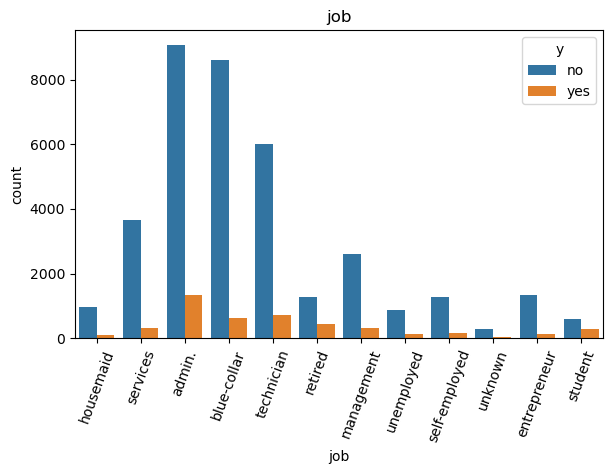

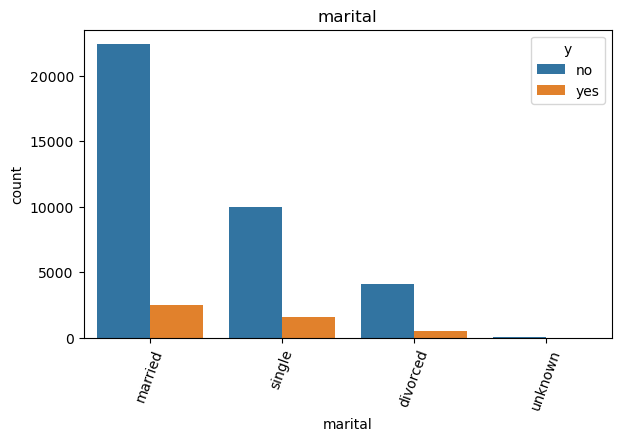

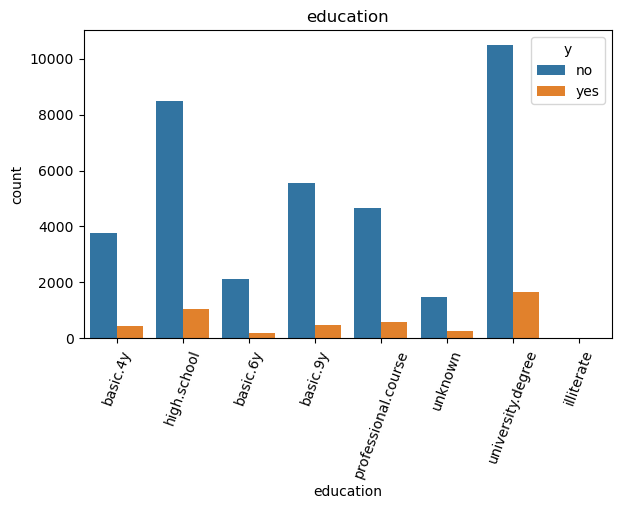

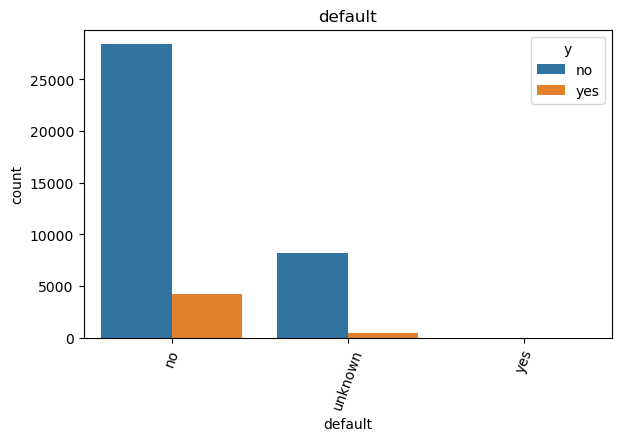

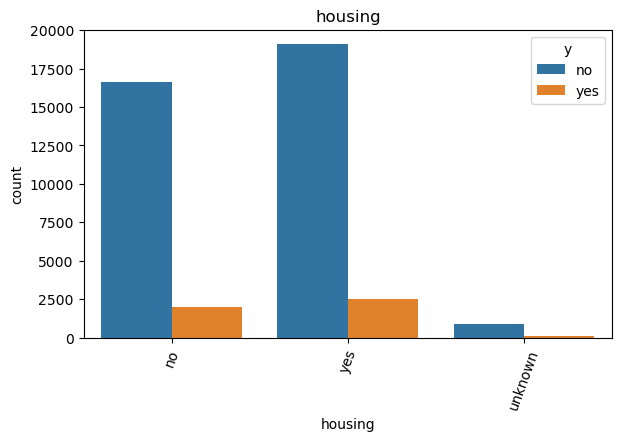

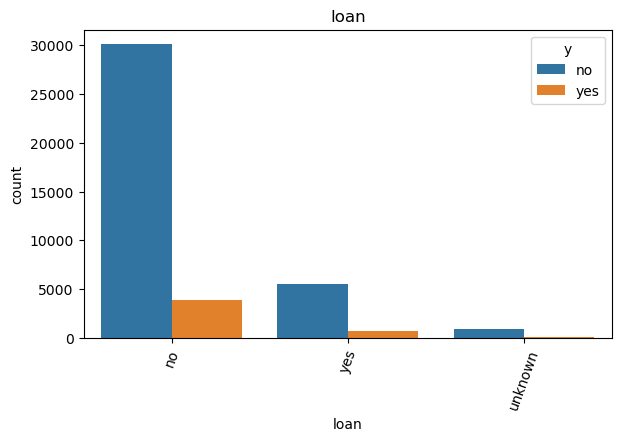

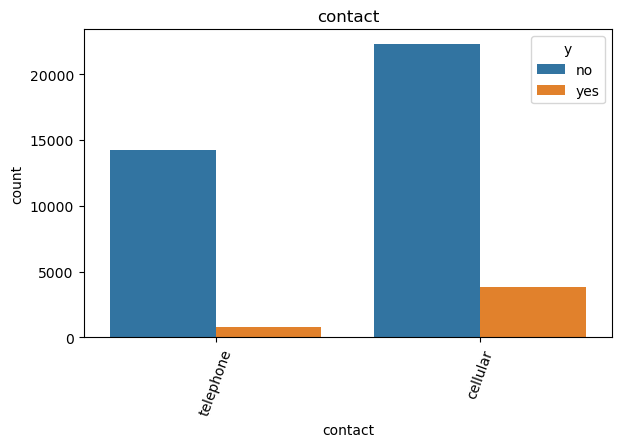

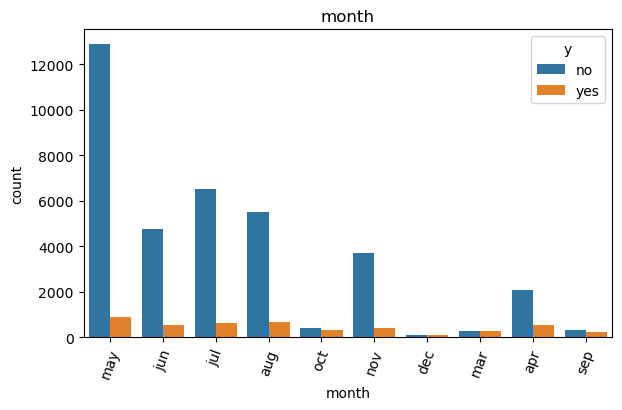

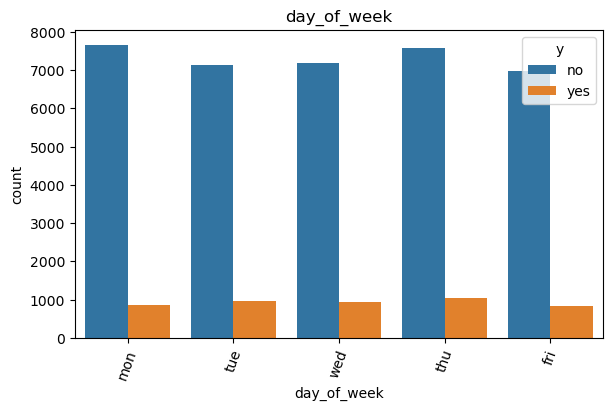

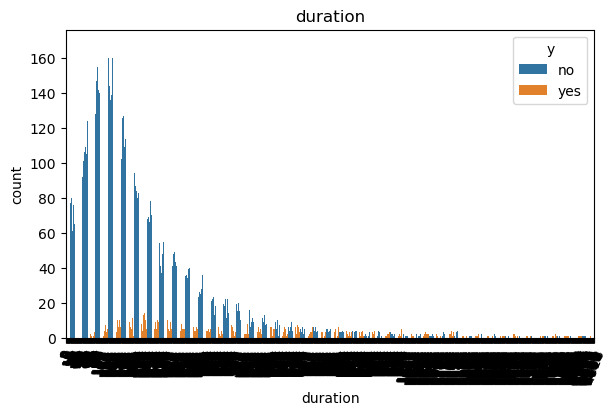

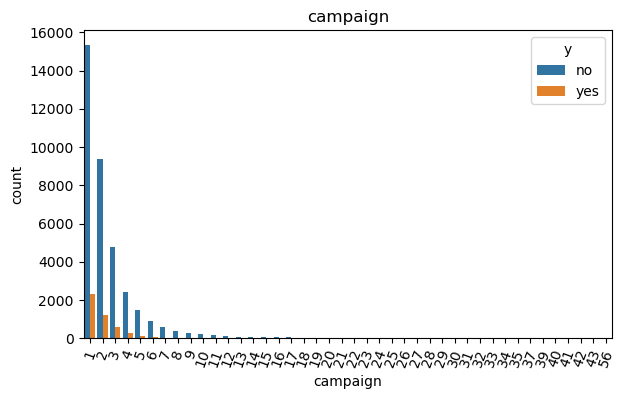

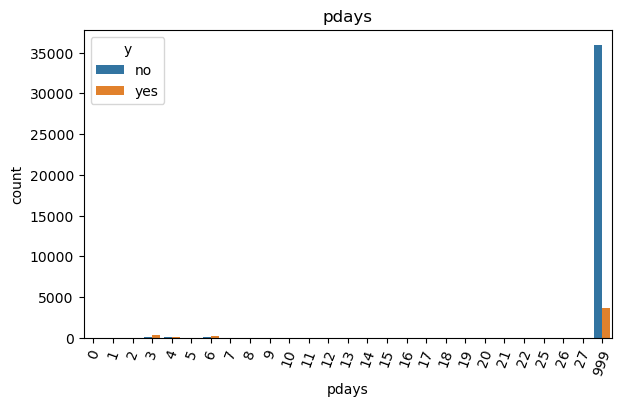

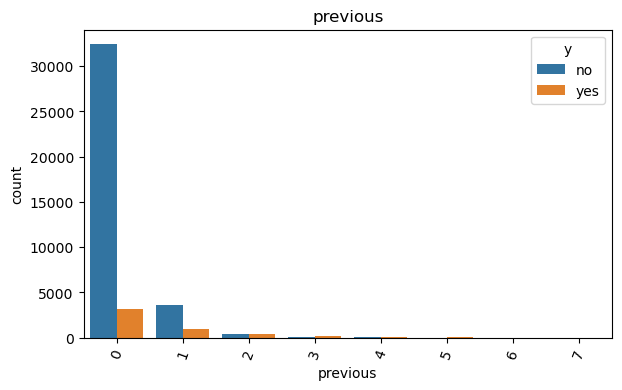

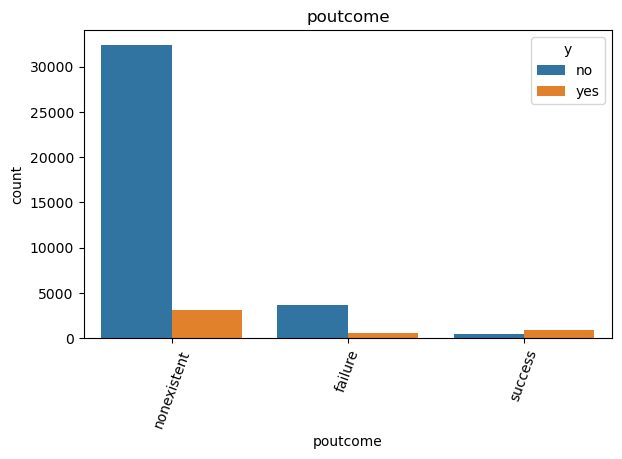

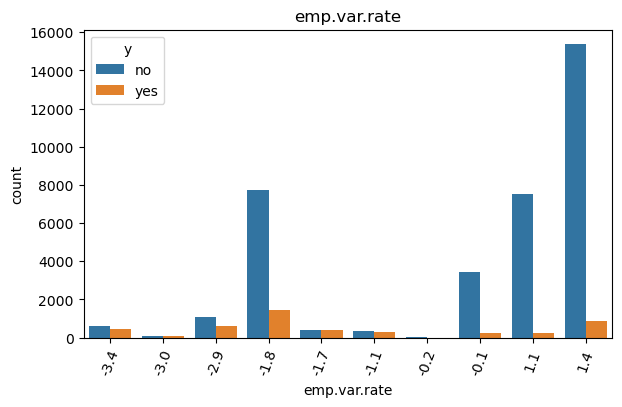

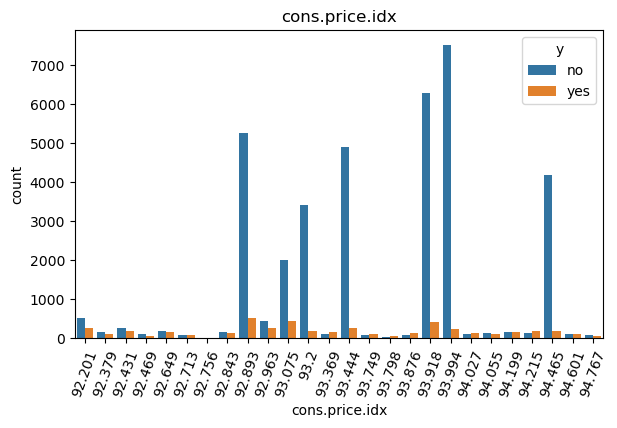

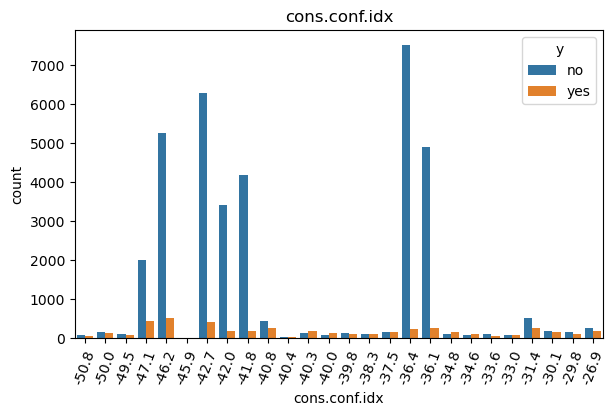

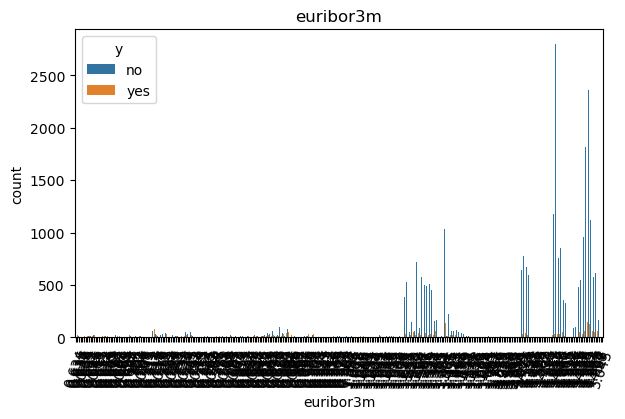

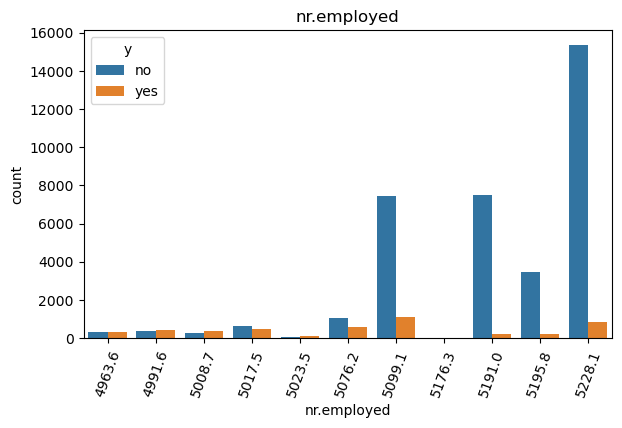

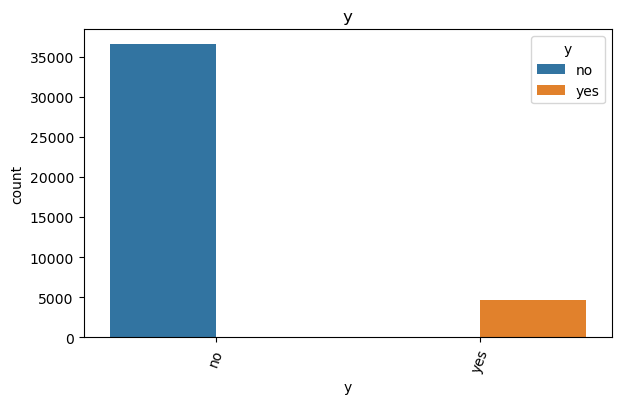

In [18]:
for column in data:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.countplot(x=data[column],hue=data['y'],data=data)
    plt.title(column)
    plt.xticks(rotation=70)
    plt.show()

In [19]:
categorical_columns = data.select_dtypes(include="object")
for categorical_columns in data.columns:
    cross_tab=pd.crosstab(data[categorical_columns],data['y'],margins=True,margins_name='Total')
    print(f"\n\n Cross-tabulation for {'categorical_columns'} :\n")
    print(cross_tab.to_markdown())
    print('\n'+'*'*100+'\n')



 Cross-tabulation for categorical_columns :

| age   |    no |   yes |   Total |
|:------|------:|------:|--------:|
| 17    |     3 |     2 |       5 |
| 18    |    16 |    12 |      28 |
| 19    |    22 |    20 |      42 |
| 20    |    42 |    23 |      65 |
| 21    |    73 |    29 |     102 |
| 22    |   101 |    36 |     137 |
| 23    |   178 |    48 |     226 |
| 24    |   377 |    86 |     463 |
| 25    |   505 |    93 |     598 |
| 26    |   576 |   122 |     698 |
| 27    |   737 |   114 |     851 |
| 28    |   850 |   151 |    1001 |
| 29    |  1267 |   186 |    1453 |
| 30    |  1512 |   202 |    1714 |
| 31    |  1727 |   220 |    1947 |
| 32    |  1662 |   184 |    1846 |
| 33    |  1623 |   210 |    1833 |
| 34    |  1561 |   184 |    1745 |
| 35    |  1592 |   167 |    1759 |
| 36    |  1626 |   154 |    1780 |
| 37    |  1338 |   137 |    1475 |
| 38    |  1264 |   143 |    1407 |
| 39    |  1318 |   114 |    1432 |
| 40    |  1077 |    84 |    1161 |
| 41    |  1165 |



 Cross-tabulation for categorical_columns :

| euribor3m   |    no |   yes |   Total |
|:------------|------:|------:|--------:|
| 0.634       |     2 |     6 |       8 |
| 0.635       |    21 |    22 |      43 |
| 0.636       |    11 |     3 |      14 |
| 0.637       |     1 |     5 |       6 |
| 0.638       |     2 |     5 |       7 |
| 0.639       |     5 |    11 |      16 |
| 0.64        |     5 |     5 |      10 |
| 0.642       |    18 |    17 |      35 |
| 0.643       |    12 |    11 |      23 |
| 0.644       |    14 |    24 |      38 |
| 0.645       |    15 |    11 |      26 |
| 0.646       |    26 |    23 |      49 |
| 0.649       |     4 |     6 |      10 |
| 0.65        |     8 |     4 |      12 |
| 0.651       |     4 |     3 |       7 |
| 0.652       |     8 |    27 |      35 |
| 0.653       |     6 |    13 |      19 |
| 0.654       |     7 |    13 |      20 |
| 0.655       |    10 |    24 |      34 |
| 0.659       |     5 |    10 |      15 |
| 0.663       |     7 |     4

In [20]:
data[data['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [21]:
da =data.loc[(data['pdays']==999)&(data['y']=='yes')]
da

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Multivarient anaysis

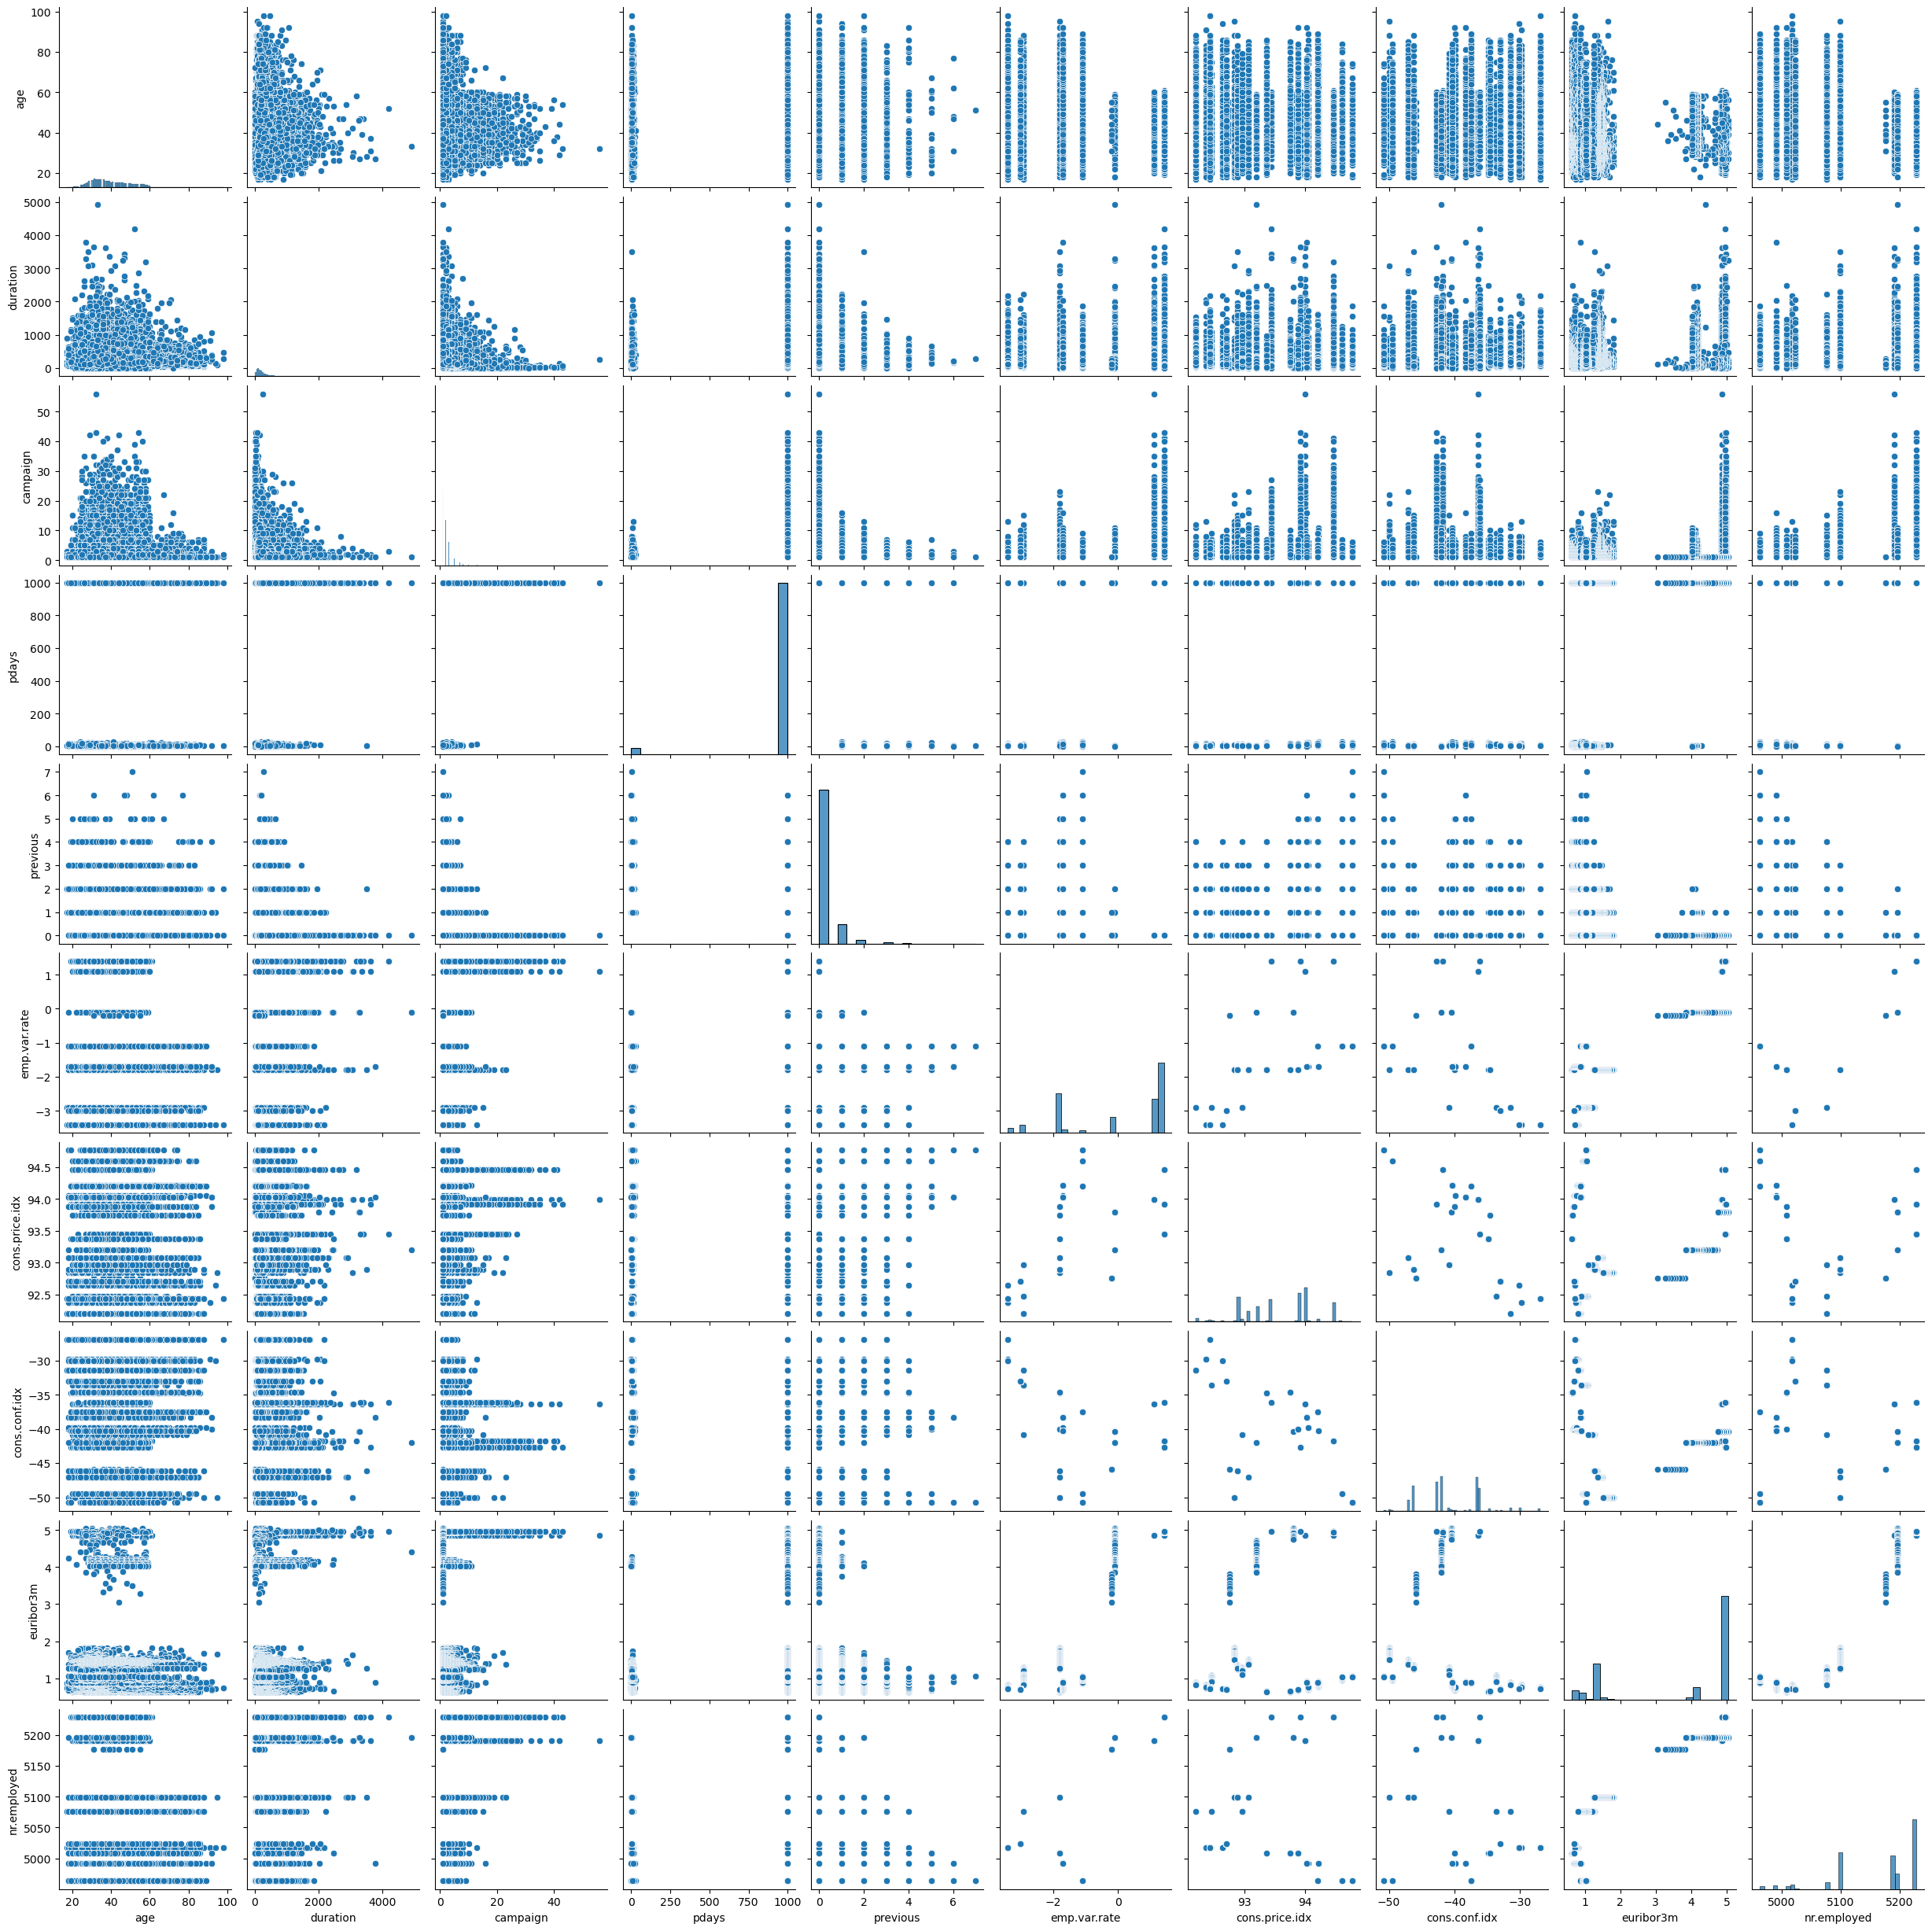

In [22]:
sns.pairplot(data)
plt.show()

<Axes: >

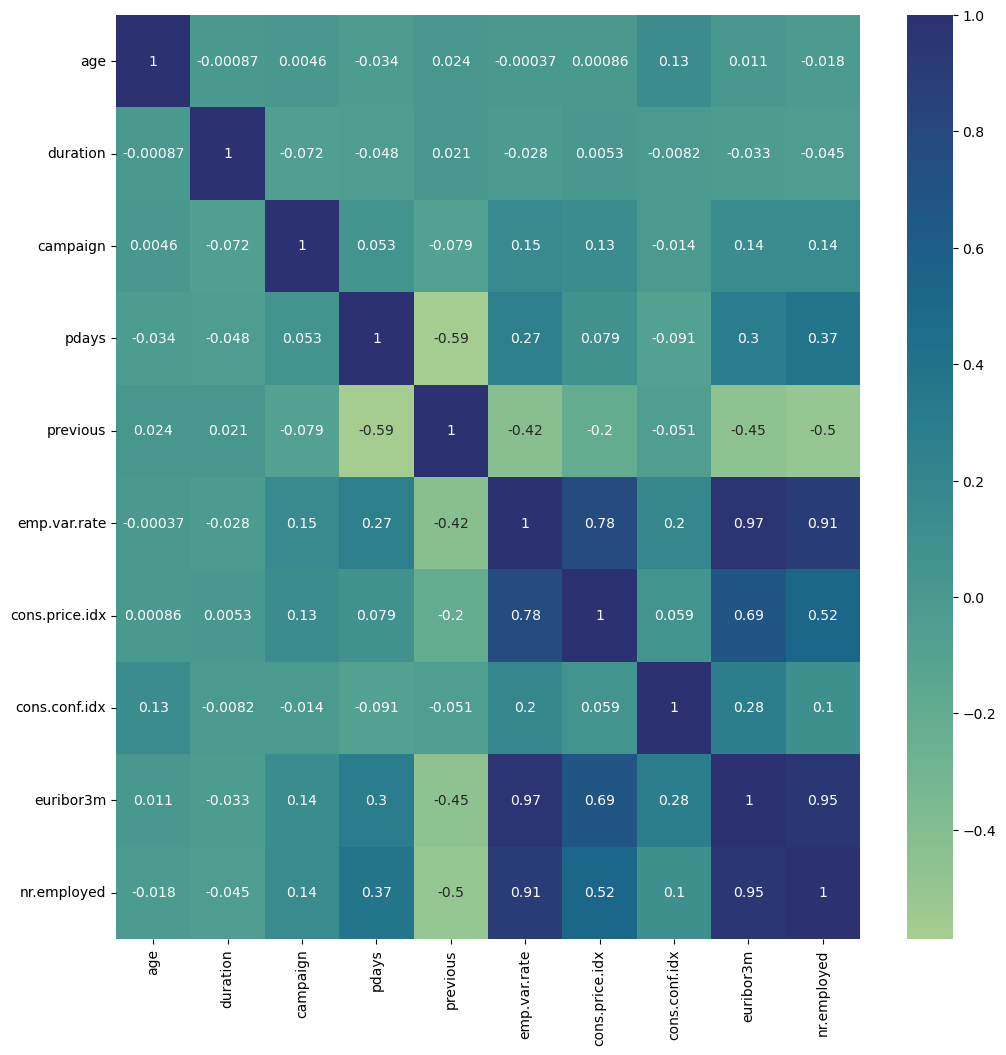

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='crest')

In [24]:
data.drop(['euribor3m','nr.employed'], axis="columns", inplace=True)

In [25]:
# Library for statistical operations
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats


In [26]:
target_variable = 'y'

categorical_columns = data.select_dtypes(include=['object']).columns

chi2_results = []

for col in categorical_columns:
    if col != target_variable:
        contingency_table = pd.crosstab(data[col], data[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.append(
            {
            'Column': col,
            'Chi-squared': '{:.2f}'.format(chi2),
            'P-value': '{:.4f}'.format(p)
            }
        )

# Display the results
results_df = pd.DataFrame(chi2_results)
print(results_df)

        Column Chi-squared P-value
0          job      961.24  0.0000
1      marital      122.66  0.0000
2    education      193.11  0.0000
3      default      406.58  0.0000
4      housing        5.68  0.0583
5         loan        1.09  0.5787
6      contact      862.32  0.0000
7        month     3101.15  0.0000
8  day_of_week       26.14  0.0000
9     poutcome     4230.52  0.0000


In [27]:
target_variable = 'y'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

t_test_results = []

for num_col in numerical_columns:
    group_yes = data[data[target_variable] == 'yes'][num_col]
    group_no = data[data[target_variable] == 'no'][num_col]

    # Perform a t-test
    t_statistic, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Assuming unequal variance

    t_test_results.append({
        'Variable': num_col,
        'T-statistic': t_statistic,
        'P-value': '{:.2f}'.format(p_value)  # Format p-value to display only 2 decimal places
    })

# Display the results
results_df = pd.DataFrame(t_test_results)
print(results_df)

         Variable  T-statistic P-value
0             age     4.779543    0.00
1        duration    55.500166    0.00
2        campaign   -20.249378    0.00
3           pdays   -32.250869    0.00
4        previous    28.125534    0.00
5    emp.var.rate   -59.136663    0.00
6  cons.price.idx   -24.082467    0.00
7   cons.conf.idx     8.636458    0.00


# Preprocessing

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.drop('duration',axis=1,inplace=True)

In [30]:
data.replace('unknown',np.nan,inplace=True)

In [31]:
# Replace null value

categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with the mode
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

data = pd.DataFrame(data)

In [32]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


In [34]:
## using IQR to remove the outliers
IQR_age = stats.iqr(data.age, interpolation = 'midpoint')

Q1_age = data.age.quantile(0.25)

Q3_age = data.age.quantile(0.75)

min_limit_age = Q1_age - 1.5*IQR_age

max_limit_age = Q3_age + 1.5*IQR_age

data.loc[(data.age > max_limit_age) | (data.age < min_limit_age), 'age']=np.median(data.age)

In [35]:
# Import libraries for handling categorical data

from sklearn.preprocessing import LabelEncoder
# Changing categorical data to Numeric data using LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the Data after label encoding
print(data)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        0        0     0        1      6   
2       37    7        1          3        0        1     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     1        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        1          5        0        1     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        1     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   38    5        1          5        0        1     0        0      7   

       day_of_week  campaign  pdays  previous  pout

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41175 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  int32  
 2   marital         41175 non-null  int32  
 3   education       41175 non-null  int32  
 4   default         41175 non-null  int32  
 5   housing         41175 non-null  int32  
 6   loan            41175 non-null  int32  
 7   contact         41175 non-null  int32  
 8   month           41175 non-null  int32  
 9   day_of_week     41175 non-null  int32  
 10  campaign        41175 non-null  int64  
 11  pdays           41175 non-null  int64  
 12  previous        41175 non-null  int64  
 13  poutcome        41175 non-null  int32  
 14  emp.var.rate    41175 non-null  float64
 15  cons.price.idx  41175 non-null  float64
 16  cons.conf.idx   41175 non-null  float64
 17  y               41175 non-null 

In [37]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,0
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1


In [38]:
scaling =data.iloc[ : , :-1]

In [39]:
scaling

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8


In [40]:
# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler =StandardScaler()
A =scaler.fit_transform(scaling)
data1 = pd.DataFrame (A, columns=['age', 'job', 'marital', 'education', 
                                  'default', 'housing', 'loan',
                                  'contact', 'month', 'day_of_week', 
                                  'campaign', 'pdays',
                                  'previous', 'poutcome',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx'])
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,1.706446,-0.179205,-0.279767,-1.780149,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
1,1.810379,0.947709,-0.279767,-0.338710,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
2,-0.268282,0.947709,-0.279767,-0.338710,-0.008536,0.908324,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
3,0.043517,-1.024390,-0.279767,-1.299670,-0.008536,-1.100929,-0.422951,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
4,1.706446,0.947709,-0.279767,-0.338710,-0.008536,-1.100929,2.364341,1.318149,0.762519,-0.718754,-0.565972,0.195446,-0.349556,0.192654,0.648075,0.722603,0.886544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,-0.164349,0.384252,-0.279767,0.622249,-0.008536,0.908324,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41171,0.667115,-0.742661,-0.279767,0.622249,-0.008536,-1.100929,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41172,1.706446,0.384252,-0.279767,1.102728,-0.008536,0.908324,-0.422951,-0.758639,1.193561,-1.434223,-0.205002,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103
41173,0.459249,1.511166,-0.279767,0.622249,-0.008536,-1.100929,-0.422951,-0.758639,1.193561,-1.434223,-0.565972,0.195446,-0.349556,0.192654,-0.752435,2.058057,-2.225103


In [41]:
scaler=MinMaxScaler()
scaler1=scaler.fit_transform(data1)
final_scaled = pd.DataFrame(scaler1, columns=['age', 'job', 'marital', 'education', 
                                                     'default', 'housing', 'loan',
                                                     'contact', 'month', 'day_of_week',
                                                     'campaign', 'pdays',
                                                     'previous', 'poutcome',
                                                     'emp.var.rate', 'cons.price.idx',
                                                     'cons.conf.idx'])

In [42]:
final_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,0.750000,0.3,0.5,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
1,0.769231,0.7,0.5,0.500000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
2,0.384615,0.7,0.5,0.500000,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
3,0.442308,0.0,0.5,0.166667,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
4,0.750000,0.7,0.5,0.500000,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,0.403846,0.5,0.5,0.833333,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41171,0.557692,0.1,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41172,0.750000,0.5,0.5,1.000000,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.479167,1.000000,0.00000
41173,0.519231,0.9,0.5,0.833333,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000


In [43]:
# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split


In [44]:
X = final_scaled
y= data['y'].astype('int64')


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
12346,0.230769,0.2,0.5,0.166667,0.0,1.0,1.0,1.0,0.333333,0.00,0.036364,1.0,0.0,0.5,1.000000,0.669135,0.338912
18751,0.615385,0.4,0.5,0.333333,0.0,0.0,1.0,0.0,0.333333,0.50,0.272727,1.0,0.0,0.5,1.000000,0.669135,0.338912
31271,0.403846,0.1,1.0,0.000000,0.0,1.0,0.0,0.0,0.666667,1.00,0.018182,1.0,0.0,0.5,0.333333,0.269680,0.192469
3315,0.346154,0.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.666667,0.50,0.000000,1.0,0.0,0.5,0.937500,0.698753,0.602510
21960,0.807692,0.4,0.5,1.000000,0.0,0.0,0.0,0.0,0.111111,1.00,0.000000,1.0,0.0,0.5,1.000000,0.484412,0.615063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.326923,0.1,0.5,0.333333,0.0,0.0,1.0,1.0,0.666667,0.75,0.018182,1.0,0.0,0.5,0.937500,0.698753,0.602510
11284,0.230769,0.0,0.5,0.333333,0.0,1.0,0.0,1.0,0.444444,0.50,0.000000,1.0,0.0,0.5,1.000000,0.882307,0.376569
38158,0.230769,0.0,1.0,1.000000,0.0,1.0,0.0,0.0,0.888889,0.50,0.000000,1.0,0.0,0.5,0.000000,0.089634,1.000000
860,0.442308,0.4,0.5,1.000000,0.0,1.0,0.0,1.0,0.666667,1.00,0.018182,1.0,0.0,0.5,0.937500,0.698753,0.602510


In [47]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
27218,0.615385,0.9,0.5,0.000000,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.142857,0.0,0.687500,0.389322,0.368201
35019,0.384615,0.1,1.0,0.166667,0.0,1.0,0.0,0.0,0.666667,0.00,0.018182,1.0,0.000000,0.5,0.333333,0.269680,0.192469
22737,0.769231,0.1,0.5,0.333333,0.0,1.0,0.0,0.0,0.111111,0.25,0.018182,1.0,0.000000,0.5,1.000000,0.484412,0.615063
32896,0.346154,0.1,0.5,0.000000,0.0,1.0,0.0,0.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.333333,0.269680,0.192469
6340,0.442308,0.9,0.5,0.833333,0.0,1.0,0.0,1.0,0.666667,0.75,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.602510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,0.711538,0.0,0.5,1.000000,0.0,1.0,0.0,0.0,0.333333,0.50,0.472727,1.0,0.000000,0.5,1.000000,0.669135,0.338912
36680,0.384615,0.8,1.0,1.000000,0.0,0.0,1.0,0.0,0.444444,0.00,0.000000,1.0,0.000000,0.5,0.104167,0.296960,0.418410
24017,0.250000,0.9,1.0,1.000000,0.0,0.0,0.0,1.0,0.888889,1.00,0.000000,1.0,0.000000,0.5,0.687500,0.622369,0.435146
1871,0.557692,0.1,0.5,0.833333,0.0,1.0,0.0,1.0,0.666667,0.00,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.602510


In [48]:
print("Shape of training dataset is: ", X_train.shape)

Shape of training dataset is:  (32940, 17)


In [49]:
y_train.value_counts()

0    29252
1     3688
Name: y, dtype: int64

In [50]:
# Data is highly unbalanced
# Observations of "1" is very low

In [51]:
# Apply SMOTE Technique to balance the data
from imblearn.over_sampling import SMOTE
from collections import Counter

In [52]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
print("Actual Classes", Counter(y_train))
print("SMOTE Classes", Counter(y_smote))

Actual Classes Counter({0: 29252, 1: 3688})
SMOTE Classes Counter({0: 29252, 1: 29252})


In [53]:
y_smote.value_counts()

0    29252
1    29252
Name: y, dtype: int64

# Logistics Regression

In [54]:
# imorting logisting regression liabrary
from sklearn.linear_model import LogisticRegression

In [55]:
Model =LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression()

In [56]:
# Make predictions on the test data
y_pred_log = Model.predict(X_test)

In [57]:
# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Libraries to evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.90
Confusion Matrix:
[[7194   90]
 [ 745  206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7284
           1       0.70      0.22      0.33       951

    accuracy                           0.90      8235
   macro avg       0.80      0.60      0.64      8235
weighted avg       0.88      0.90      0.87      8235



In [58]:
y_test.value_counts()

0    7284
1     951
Name: y, dtype: int64

In [59]:
y_test

27226    0
35030    0
22744    0
32906    0
6341     0
        ..
18652    0
36691    0
24024    1
1872     0
31698    0
Name: y, Length: 8235, dtype: int64

In [1]:
y_pred_prob=Model.predict_proba(X_test)
y_pred_prob

NameError: name 'Model' is not defined

In [61]:
# changing threshold and predicting 
print('prediction with threshold 0.2 :') 
y_pred_new_threshold = (Model.predict_proba(X_test)[:, 1] >= 0.2).astype(int) 
print(y_pred_new_threshold)

prediction with threshold 0.2 :
[0 0 0 ... 0 0 0]


In [62]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_new_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
class_report = classification_report(y_test, y_pred_new_threshold)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[6650  634]
 [ 421  530]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7284
           1       0.46      0.56      0.50       951

    accuracy                           0.87      8235
   macro avg       0.70      0.74      0.71      8235
weighted avg       0.88      0.87      0.88      8235



In [63]:
# Training model of balanced dataset by SMOTE
model1 = LogisticRegression()

# Fit the model on the resampled training data
model1.fit(X_smote, y_smote)

LogisticRegression()

In [64]:
y_pred_log_sm = model1.predict(X_test)

In [65]:
# Evaluation matrics to evaluate trained model on test dataset
acurracy = accuracy_score(y_test,y_pred_log_sm)
con_matrix=confusion_matrix(y_test,y_pred_log_sm)
class_report =classification_report(y_test,y_pred_log_sm)

print(f"Accuracy: {accuracy:.2f}" )
print('\nConfusion Matrix:\n')
print(conf_matrix)
print(class_report)

Accuracy: 0.87

Confusion Matrix:

[[6650  634]
 [ 421  530]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7284
           1       0.31      0.70      0.43       951

    accuracy                           0.79      8235
   macro avg       0.63      0.75      0.65      8235
weighted avg       0.88      0.79      0.82      8235



# K-Means Classifier Algorithm

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.cluster import KMeans 
# Initialise the model with K as 3
model4=KMeans (n_clusters=3,random_state=15)


model4.fit(X_train)


KMeans(n_clusters=3, random_state=15)

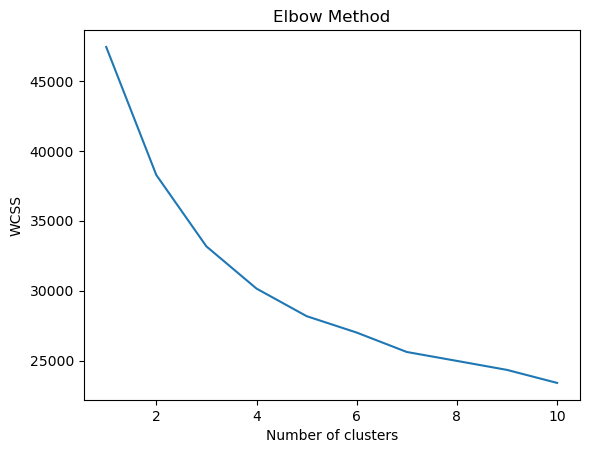

In [67]:
#Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# Initialise the model with K as 3
model5 = KMeans(n_clusters=2, random_state=15)

# Training the model
model5.fit(X_train)

KMeans(n_clusters=2, random_state=15)

In [69]:
y_pred_kmeans = model5.predict(X_test)

In [2]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_kmeans)
conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
class_report = classification_report(y_test, y_pred_kmeans)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

NameError: name 'accuracy_score' is not defined

# KNN 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate=[]
for i in range (1,11):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))#it calculates the proportion of misclassified samples in the test set

In [73]:
error_rate

[0.15628415300546447,
 0.11475409836065574,
 0.11924711596842745,
 0.10977534911961141,
 0.1106253794778385,
 0.10734669095324834,
 0.10941105039465696,
 0.10649666059502125,
 0.1079538554948391,
 0.1079538554948391]

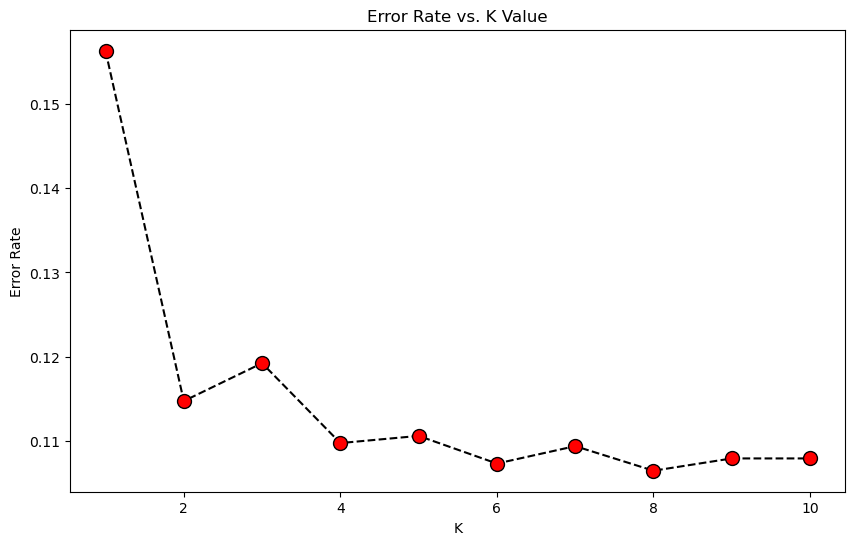

In [74]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='black',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [75]:
acc=[]
# Will take some time
from sklearn import metrics
for i in range (1,11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    Y_pred = knn2.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))

In [76]:
acc

[0.8437158469945355,
 0.8852459016393442,
 0.8807528840315726,
 0.8902246508803886,
 0.8893746205221615,
 0.8926533090467517,
 0.8905889496053431,
 0.8935033394049787,
 0.892046144505161,
 0.892046144505161]

Maximum accuracy: 0.8935033394049787 at K = 7


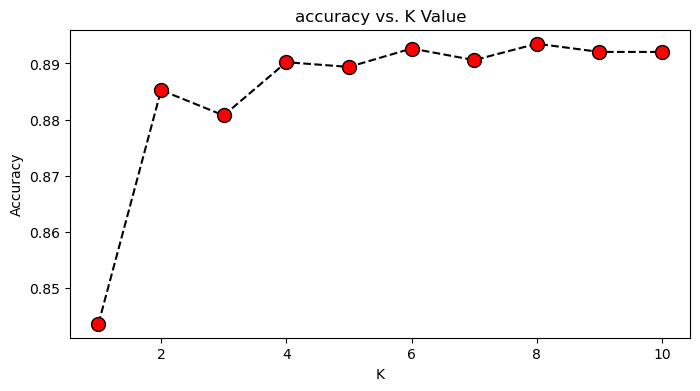

In [77]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),acc,color='black',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc), "at K =", acc.index(max(acc)))

In [78]:
y_pred_knn = knn.predict(X_test)

In [79]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[7165  119]
 [ 770  181]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7284
           1       0.60      0.19      0.29       951

    accuracy                           0.89      8235
   macro avg       0.75      0.59      0.62      8235
weighted avg       0.87      0.89      0.87      8235



# SVM

In [80]:
from sklearn.svm import SVC

In [81]:
svcclassifier =SVC()
svcclassifier.fit(X_train,y_train)

SVC()

In [82]:
# Predict the output using trained data
y_pred_svm = svcclassifier.predict(X_test)

In [83]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7210   74]
 [ 775  176]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7284
           1       0.70      0.19      0.29       951

    accuracy                           0.90      8235
   macro avg       0.80      0.59      0.62      8235
weighted avg       0.88      0.90      0.87      8235



# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
# Predict the output for test dataset
y_pred_tree = DT.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.84

Confusion Matrix:

[[6591  693]
 [ 646  305]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7284
           1       0.31      0.32      0.31       951

    accuracy                           0.84      8235
   macro avg       0.61      0.61      0.61      8235
weighted avg       0.84      0.84      0.84      8235



In [87]:
%%time
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4, 5, 6, 7],     
    "min_samples_leaf":list(range(1, 10))
    
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, 
                       scoring="accuracy",           # Evaluation metric to evaluate the model
                       n_jobs=-1,                    # Numbers of cores used to execute this code
                       verbose=1, cv=3)

# Fit the model with each parameters
tree_cv.fit(X_train, y_train)

# It will print Best Parameters
best_params = tree_cv.best_params_ 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4104 candidates, totalling 12312 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'})
CPU times: total: 36 s
Wall time: 1min 34s


In [3]:
# Passing best parameter to decision tree
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf= 6, min_samples_split=2, splitter='best')

# Training model with best parameter
dt1.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [111]:
# Predicton using Decision Tree
y_pred_hyper_decision = dt1.predict(X_test)

In [90]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_hyper_decision)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_decision)
class_report = classification_report(y_test, y_pred_hyper_decision)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7197   87]
 [ 763  188]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7284
           1       0.68      0.20      0.31       951

    accuracy                           0.90      8235
   macro avg       0.79      0.59      0.63      8235
weighted avg       0.88      0.90      0.87      8235



# Random Forest Algorithm

In [91]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=200)

rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [92]:
y_pred_forest = rf.predict(X_test)

In [93]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
class_report = classification_report(y_test, y_pred_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[7058  226]
 [ 684  267]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7284
           1       0.54      0.28      0.37       951

    accuracy                           0.89      8235
   macro avg       0.73      0.62      0.65      8235
weighted avg       0.87      0.89      0.87      8235



In [94]:
%%time
# Time taken to execute this cell

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 90.15%
CPU times: total: 15.7 s
Wall time: 15min 38s


In [95]:
rf_clf2 = RandomForestClassifier(bootstrap = True, max_depth= 10, max_features= 'sqrt', min_samples_leaf=2, min_samples_split= 10, n_estimators=200, random_state= 42)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [96]:
y_pred_hyper_forest = rf_clf2.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred_hyper_forest)
conf_matrix = confusion_matrix(y_test, y_pred_hyper_forest)
class_report = classification_report(y_test, y_pred_hyper_forest)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)


Accuracy: 0.90

Confusion Matrix:

[[7184  100]
 [ 753  198]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7284
           1       0.66      0.21      0.32       951

    accuracy                           0.90      8235
   macro avg       0.78      0.60      0.63      8235
weighted avg       0.88      0.90      0.87      8235



# Bagging Algorithm

In [98]:
LR = LogisticRegression()

In [99]:
model_bagg = BaggingClassifier(base_estimator = LR, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [100]:
y_pred_bagg_log = model_bagg.predict(X_test)

In [101]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_log)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_log)
class_report = classification_report(y_test, y_pred_bagg_log)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7194   90]
 [ 744  207]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7284
           1       0.70      0.22      0.33       951

    accuracy                           0.90      8235
   macro avg       0.80      0.60      0.64      8235
weighted avg       0.88      0.90      0.87      8235



# Bagging using KNN

In [102]:
# Create a KNN classifier with 3 neighbors
KNN = KNeighborsClassifier(n_neighbors=3)

In [103]:
# Initialise the Bagging Classifier Model using base model of KNN
model_bagg = BaggingClassifier(base_estimator=KNN, n_estimators=100)

# Fit the Bagging Classifier Model
model_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100)

In [104]:
y_pred_bagg_knn = model_bagg.predict(X_test)

In [105]:
# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_bagg_knn)
conf_matrix = confusion_matrix(y_test, y_pred_bagg_knn)
class_report = classification_report(y_test, y_pred_bagg_knn)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.89

Confusion Matrix:

[[7039  245]
 [ 691  260]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7284
           1       0.51      0.27      0.36       951

    accuracy                           0.89      8235
   macro avg       0.71      0.62      0.65      8235
weighted avg       0.86      0.89      0.87      8235



# Boosting Technique

In [106]:
gbm = GradientBoostingClassifier()

# Fit the Gradient Boosting Classifier
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [107]:
y_pred_gbm = gbm.predict(X_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_pred_gbm)
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
class_report = classification_report(y_test, y_pred_gbm)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Accuracy: 0.90

Confusion Matrix:

[[7184  100]
 [ 733  218]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7284
           1       0.69      0.23      0.34       951

    accuracy                           0.90      8235
   macro avg       0.80      0.61      0.64      8235
weighted avg       0.88      0.90      0.88      8235



# Conclusion